# Imports and Config

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7]

flag_logs = False
flag_export_plots = False

datapath = '../SGO_data/'

In [3]:
col_touse = ['COD_ATENDIMENTO', 'COD_TELEATENDIMENTO',
       'DSC_HISTORICO', 'DT_FINALIZADO', 'DT_CADASTRO', 'DESTAQUE',
       'DT_LIBERAR_FECHAMENTO',
       'DSC_TERMO_CIRCUNSTANCIADO_PMDF', 'COD_TIPO_UNIDADE', 'DSC_UNIDADE',
       'DSC_AGENCIA', 'NM_SIGLA', 'NR_ATENDIMENTO',
       'NR_LATITUDE_y', 'NR_LONGITUDE_y', 'DSC_BAIRRO', 'DSC_CIDADE', 'DSC_NATUREZA',
       'DSC_NATUREZA_GRUPO', 'DSC_NATUREZA_SUBGRUPO',
       'DSC_NATUREZA_INICIAL', 'DSC_NATUREZA_GRUPO_INICIAL', 'DSC_NATUREZA_SUBGRUPO_INICIAL', 'NM_TIPO_DESFECHO']

atendimento = pd.read_csv(datapath + 'criados/atendimento_plus2021.csv',
                          usecols = col_touse,
                          dtype = {'DESTAQUE': bool, 'NR_LATITUDE_y': float, 'NR_LONGITUDE_y': float64, 'NR_ATENDIMENTO': int64, 'DSC_TERMO_CIRCUNSTANCIADO_PMDF': string}                               },
#                          chunksize,
                          parse_dates = ['DT_FINALIZADO', 'DT_CADASTRO', 'DT_LIBERAR_FECHAMENTO']

                         )


C:\Users\ener.beckmann\AppData\Local\Temp\ipykernel_6280\3662327321.py:1: DtypeWarning: Columns (11,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  atendimento = pd.read_csv(datapath + 'criados/atendimento_plus2021.csv')


In [8]:
atendimento.sample(5)

,Unnamed: 0.1,Unnamed: 0,COD_ATENDIMENTO,COD_TELEATENDIMENTO,DSC_HISTORICO,DT_FINALIZADO,DT_CADASTRO,DESTAQUE,NR_LATITUDE_x,NR_LONGITUDE_x,...,COD_NATUREZA_GRUPO,DSC_NATUREZA_SUBGRUPO,COD_NATUREZA_PAI_INICIAL,COD_CONFIG_INSTITUICAO_INICIAL,COD_AGENCIA_INICIAL,DSC_NATUREZA_INICIAL,DSC_NATUREZA_GRUPO_INICIAL,COD_NATUREZA_GRUPO_INICIAL,DSC_NATUREZA_SUBGRUPO_INICIAL,NM_TIPO_DESFECHO
217331,217331,521411,4071377,9878161,OCORRENCIA REPASSADA PARA A MESA DO CPTRAN,9/2/2021 13:37:16.147,2021-02-09 13:01:19,0,NaN,NaN,...,4,DELITOS,12.0,NaN,4.0,EXERCÍCIO ILEGAL DE PROFISSÃO OU ATIVIDADE,OPERAÇÃO,4,DELITOS,ATENDIMENTO REDIRECIONADO
736658,736658,920848,4580747,10669679,# SOLICITANTE INFORMA DE UM VEICULO PARADO E...,4/8/2021 11:55:11.067,2021-08-04 11:50:55,0,NaN,NaN,...,4,DELITOS,19.0,NaN,4.0,EM APURAÇÃO,OPERAÇÃO,4,DE BUSCA E SALVAMENTO,ENDEREÇO INCOMPLETO
656582,656582,1039231,4739096,10905372,COMPARTILHADO PELO USUARIO DANILSON ALVES DOS ...,19/9/2021 06:14:30.53,2021-09-19 01:13:39,0,NaN,NaN,...,4,DELITOS,336.0,NaN,4.0,SOM ALTO - AUTOMOTIVO,OPERAÇÃO,4,DELITOS,CANCELADO POR FALTA DE VIATURA
351306,351306,1056425,4756290,10932918,# SOL INF QUE MOTORISTA DE UBER NAO PAGOU A E...,25/9/2021 23:45:19.08,2021-09-25 21:43:32,0,NaN,NaN,...,4,DE BUSCA E SALVAMENTO,19.0,NaN,4.0,EM APURAÇÃO,OPERAÇÃO,4,DE BUSCA E SALVAMENTO,RESOLVIDO NO LOCAL
198848,198848,748637,4368552,10341690,# Solicitante informa que 2 desconhecidos faz...,21/5/2021 14:07:59.56,2021-05-21 14:00:25,0,NaN,NaN,...,4,DELITOS,10.0,NaN,4.0,ROUBO (TENTATIVA),OPERAÇÃO,4,DELITOS,ATENDIMENTO REDIRECIONADO


In [9]:
def plot_groupbar(df, coluna, limit=0, sort = True, nome = ''):
    if sort:
        agrupado = df[['COD_ATENDIMENTO', coluna]].groupby(coluna).count().sort_values(by = 'COD_ATENDIMENTO', ascending=False)
    else:
        agrupado = df[['COD_ATENDIMENTO', coluna]].groupby(coluna).count()

    if limit:
        agrupado.head(limit).plot(kind = 'bar')
    else:  
        agrupado.plot(kind = 'bar')

    if flag_export_plots:
        plt.savefig('plots/' + nome + '_' + coluna + '.png')

In [10]:
atendimento.nunique()

Unnamed: 0.1                      788485
Unnamed: 0                        788485
COD_ATENDIMENTO                   788484
COD_TELEATENDIMENTO               508056
DSC_HISTORICO                     523010
DT_FINALIZADO                     788407
DT_CADASTRO                       648651
DESTAQUE                               2
NR_LATITUDE_x                          0
NR_LONGITUDE_x                         0
DT_LIBERAR_FECHAMENTO             788407
DSC_TERMO_CIRCUNSTANCIADO_PMDF       460
COD_TIPO_UNIDADE                       3
DSC_UNIDADE                           64
DSC_AGENCIA                           11
NM_SIGLA                              11
COD_TIPO_TELEATENDIMENTO               1
NR_ATENDIMENTO                    508043
NR_LATITUDE_y                      29651
NR_LONGITUDE_y                     30809
LISTA_UNIDADES                      1082
DT_FATO                                0
DSC_BAIRRO                           241
DSC_CIDADE                            51
COD_NATUREZA_PAI

In [12]:
atendimento.isnull().sum()

Unnamed: 0.1                           0
Unnamed: 0                             0
COD_ATENDIMENTO                        0
COD_TELEATENDIMENTO                    0
DSC_HISTORICO                          0
DT_FINALIZADO                          0
DT_CADASTRO                            0
DESTAQUE                               0
NR_LATITUDE_x                     788485
NR_LONGITUDE_x                    788485
DT_LIBERAR_FECHAMENTO                  0
DSC_TERMO_CIRCUNSTANCIADO_PMDF    788021
COD_TIPO_UNIDADE                       0
DSC_UNIDADE                            0
DSC_AGENCIA                            0
NM_SIGLA                               0
COD_TIPO_TELEATENDIMENTO               0
NR_ATENDIMENTO                         0
NR_LATITUDE_y                     475389
NR_LONGITUDE_y                    475389
LISTA_UNIDADES                        49
DT_FATO                           788485
DSC_BAIRRO                             0
DSC_CIDADE                             0
COD_NATUREZA_PAI

In [35]:
atendimento.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                          int64
COD_ATENDIMENTO                     int64
COD_TELEATENDIMENTO                 int64
DSC_HISTORICO                      object
DT_FINALIZADO                      object
DT_CADASTRO                        object
DESTAQUE                            int64
NR_LATITUDE_x                     float64
NR_LONGITUDE_x                    float64
DT_LIBERAR_FECHAMENTO              object
DSC_TERMO_CIRCUNSTANCIADO_PMDF     object
COD_TIPO_UNIDADE                    int64
DSC_UNIDADE                        object
DSC_AGENCIA                        object
NM_SIGLA                           object
COD_TIPO_TELEATENDIMENTO            int64
NR_ATENDIMENTO                    float64
NR_LATITUDE_y                      object
NR_LONGITUDE_y                     object
LISTA_UNIDADES                     object
DT_FATO                           float64
DSC_BAIRRO                         object
DSC_CIDADE                        

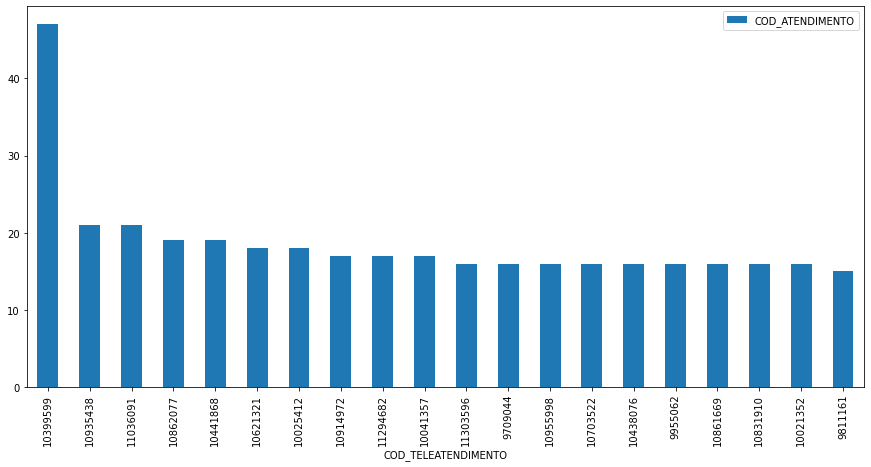

In [11]:
plot_groupbar(atendimento, 'COD_TELEATENDIMENTO' , limit=20, sort = True, nome = '')

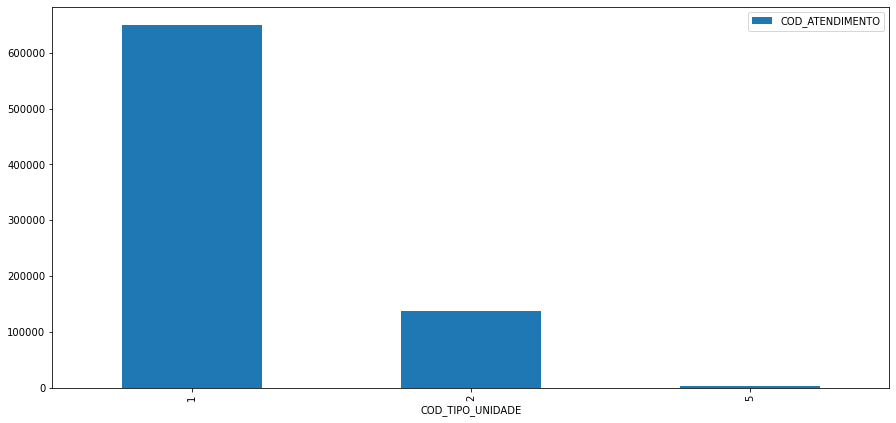

In [13]:
plot_groupbar(atendimento, 'COD_TIPO_UNIDADE' , limit=20, sort = True, nome = '')

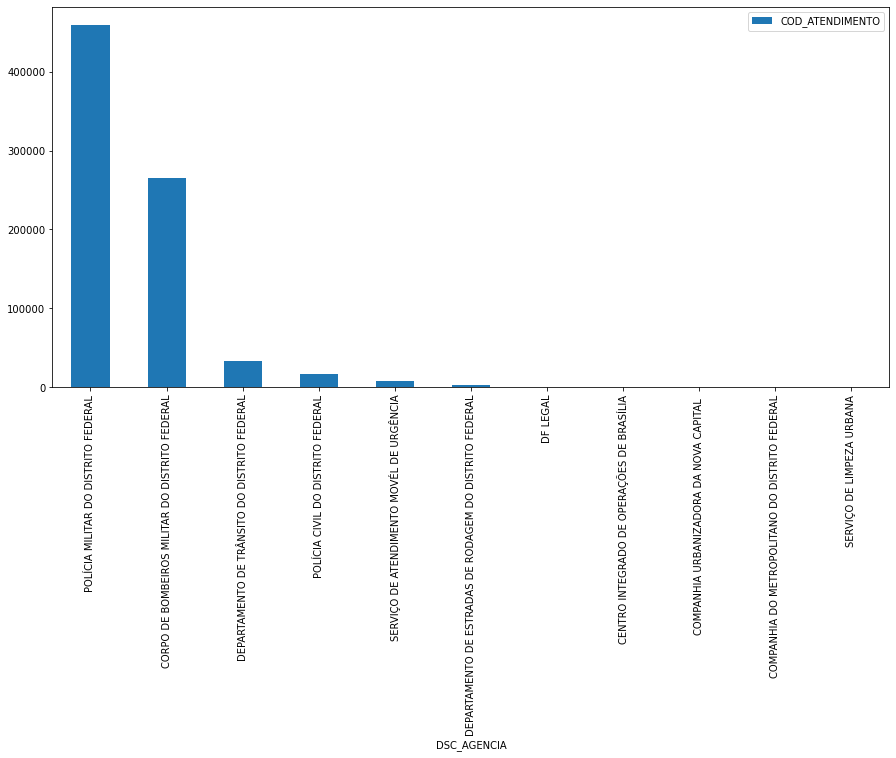

In [15]:
plot_groupbar(atendimento, 'DSC_AGENCIA' , limit=20, sort = True, nome = '')

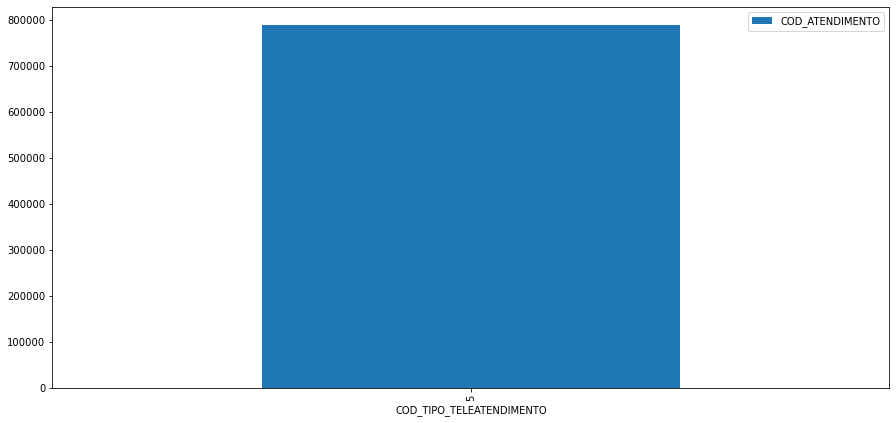

In [17]:
plot_groupbar(atendimento, 'COD_TIPO_TELEATENDIMENTO' , limit=20, sort = True, nome = '')

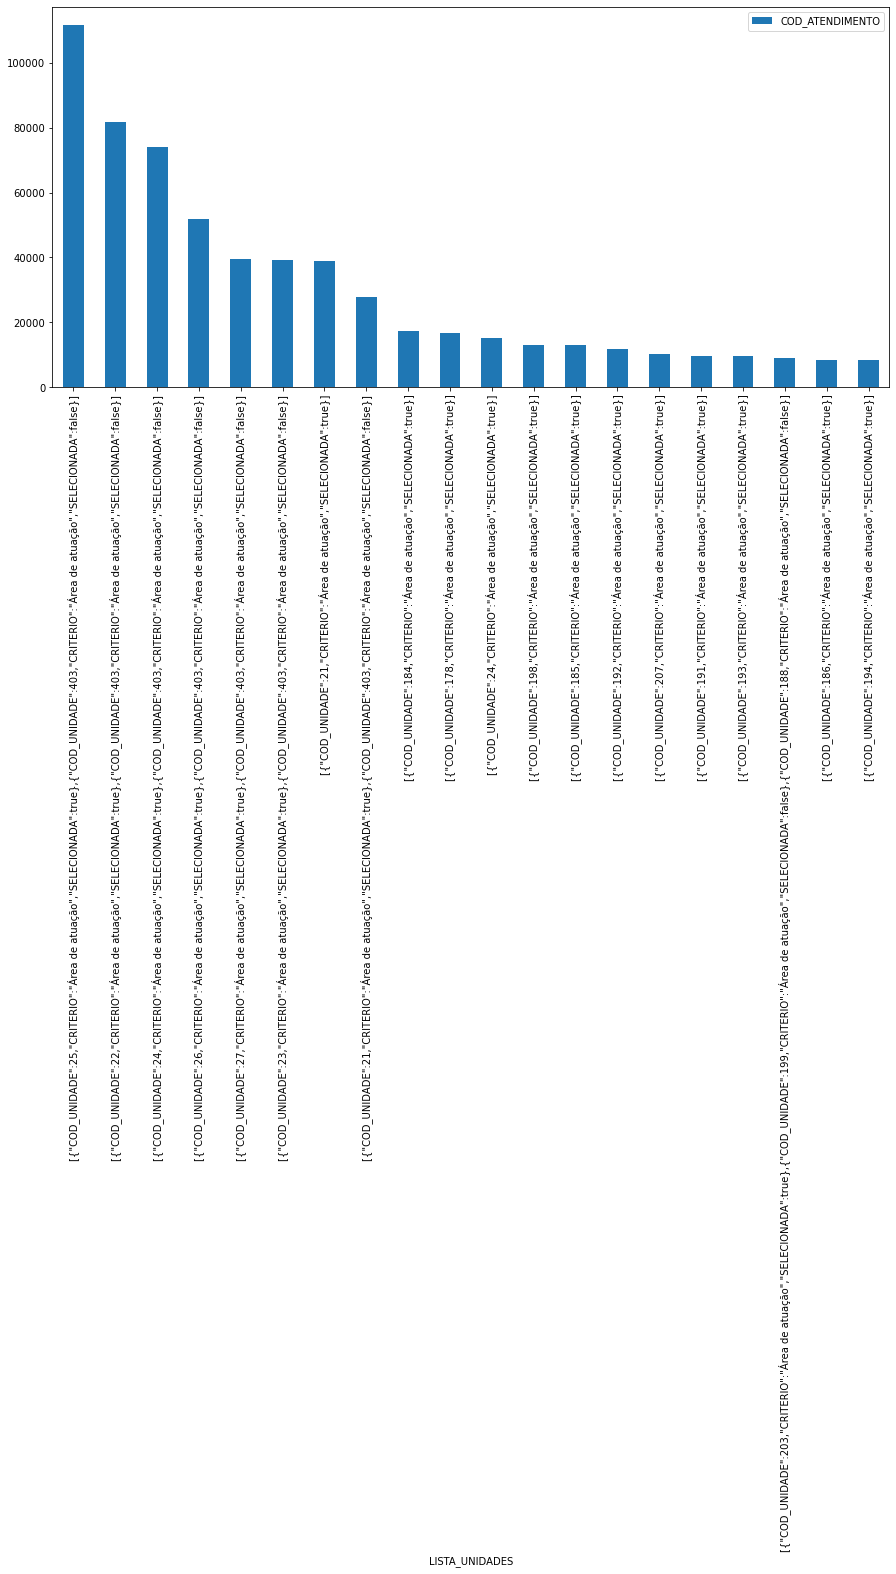

In [18]:
plot_groupbar(atendimento, 'LISTA_UNIDADES' , limit=20, sort = True, nome = '')

# Análise do Recanto

In [19]:
recanto = atendimento[atendimento['DSC_CIDADE'] == 'RECANTO DAS EMAS']

In [23]:
recanto = recanto.drop(columns = 'NR_LATITUDE_x NR_LONGITUDE_x DESTAQUE COD_TIPO_TELEATENDIMENTO LISTA_UNIDADES DT_FATO COD_NATUREZA_PAI COD_CONFIG_INSTITUICAO COD_AGENCIA COD_NATUREZA_GRUPO COD_NATUREZA_PAI_INICIAL COD_CONFIG_INSTITUICAO_INICIAL COD_AGENCIA_INICIAL COD_NATUREZA_GRUPO_INICIAL'.split())

In [24]:
recanto.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'COD_ATENDIMENTO', 'COD_TELEATENDIMENTO',
       'DSC_HISTORICO', 'DT_FINALIZADO', 'DT_CADASTRO',
       'DT_LIBERAR_FECHAMENTO', 'DSC_TERMO_CIRCUNSTANCIADO_PMDF',
       'COD_TIPO_UNIDADE', 'DSC_UNIDADE', 'DSC_AGENCIA', 'NM_SIGLA',
       'NR_ATENDIMENTO', 'NR_LATITUDE_y', 'NR_LONGITUDE_y', 'DSC_BAIRRO',
       'DSC_CIDADE', 'DSC_NATUREZA', 'DSC_NATUREZA_GRUPO',
       'DSC_NATUREZA_SUBGRUPO', 'DSC_NATUREZA_INICIAL',
       'DSC_NATUREZA_GRUPO_INICIAL', 'DSC_NATUREZA_SUBGRUPO_INICIAL',
       'NM_TIPO_DESFECHO'],
      dtype='object')

In [25]:
recanto_op = recanto[recanto['COD_TIPO_UNIDADE'] == 2]

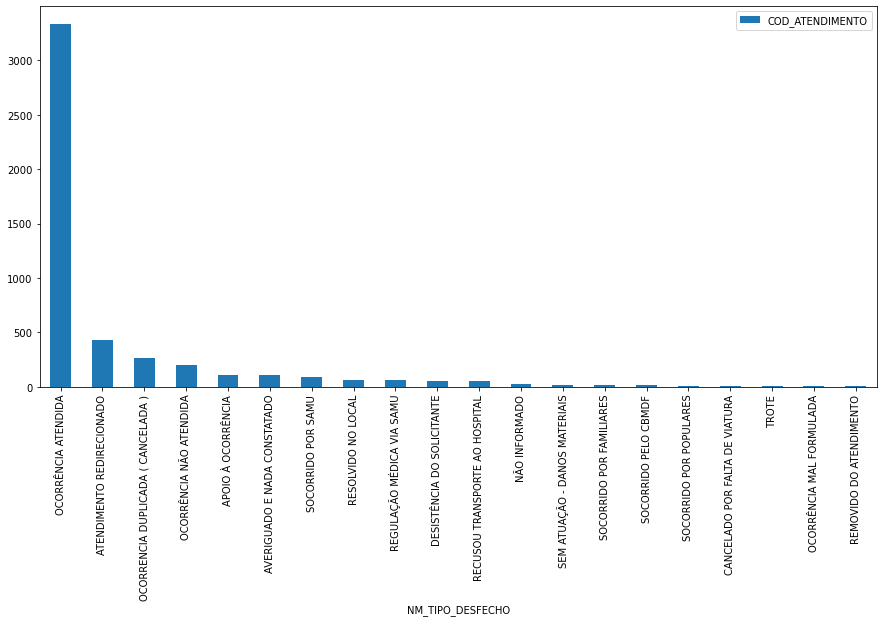

In [26]:
plot_groupbar(recanto_op, 'NM_TIPO_DESFECHO' , limit=20, sort = True, nome = '')

In [27]:
recanto_op.nunique()

Unnamed: 0.1                      4894
Unnamed: 0                        4894
COD_ATENDIMENTO                   4894
COD_TELEATENDIMENTO               4059
DSC_HISTORICO                     4702
DT_FINALIZADO                     4894
DT_CADASTRO                       4878
DT_LIBERAR_FECHAMENTO             4894
DSC_TERMO_CIRCUNSTANCIADO_PMDF       0
COD_TIPO_UNIDADE                     1
DSC_UNIDADE                         24
DSC_AGENCIA                          1
NM_SIGLA                             1
NR_ATENDIMENTO                    4059
NR_LATITUDE_y                     2823
NR_LONGITUDE_y                    2907
DSC_BAIRRO                           2
DSC_CIDADE                           1
DSC_NATUREZA                        87
DSC_NATUREZA_GRUPO                   5
DSC_NATUREZA_SUBGRUPO               13
DSC_NATUREZA_INICIAL               148
DSC_NATUREZA_GRUPO_INICIAL           5
DSC_NATUREZA_SUBGRUPO_INICIAL       13
NM_TIPO_DESFECHO                    26
dtype: int64

In [29]:
recanto_op_pordesfecho = recanto_op[['COD_ATENDIMENTO', 'NM_TIPO_DESFECHO']].groupby('NM_TIPO_DESFECHO').count().sort_values(by = 'COD_ATENDIMENTO', ascending=False)


In [30]:
recanto_op_pordesfecho

,COD_ATENDIMENTO
NM_TIPO_DESFECHO,
OCORRÊNCIA ATENDIDA,3329
ATENDIMENTO REDIRECIONADO,428
OCORRENCIA DUPLICADA ( CANCELADA ),270
OCORRÊNCIA NÃO ATENDIDA,200
APOIO À OCORRÊNCIA,112
AVERIGUADO E NADA CONSTATADO,107
SOCORRIDO POR SAMU,87
RESOLVIDO NO LOCAL,67
REGULAÇÃO MÉDICA VIA SAMU,66


In [31]:
recanto_pordesfecho = recanto[['COD_ATENDIMENTO', 'NM_TIPO_DESFECHO']].groupby('NM_TIPO_DESFECHO').count().sort_values(by = 'COD_ATENDIMENTO', ascending=False)


In [33]:
recanto_pordesfecho


,COD_ATENDIMENTO
NM_TIPO_DESFECHO,
OCORRÊNCIA ATENDIDA,9652
ATENDIMENTO REDIRECIONADO,7232
OCORRENCIA DUPLICADA ( CANCELADA ),3252
RESOLVIDO NO LOCAL,3051
AVERIGUADO E NADA CONSTATADO,2556
CANCELADO POR FALTA DE VIATURA,2007
SEM REGISTRO DE OCORRÊNCIA,1486
OCORRÊNCIA NÃO ATENDIDA,1470
DELEGACIA,1382


In [37]:
recanto_op.NR_ATENDIMENTO.sample(10)

574684    2.021071e+15
310703    2.021112e+15
607098    2.021042e+15
152086    2.021041e+15
648665    2.021122e+15
779844    2.021112e+15
459798    2.021103e+15
643145    2.021041e+15
553510    2.021071e+15
221482    2.021101e+15
Name: NR_ATENDIMENTO, dtype: float64

In [38]:
atendimento.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'COD_ATENDIMENTO', 'COD_TELEATENDIMENTO',
       'DSC_HISTORICO', 'DT_FINALIZADO', 'DT_CADASTRO', 'DESTAQUE',
       'NR_LATITUDE_x', 'NR_LONGITUDE_x', 'DT_LIBERAR_FECHAMENTO',
       'DSC_TERMO_CIRCUNSTANCIADO_PMDF', 'COD_TIPO_UNIDADE', 'DSC_UNIDADE',
       'DSC_AGENCIA', 'NM_SIGLA', 'COD_TIPO_TELEATENDIMENTO', 'NR_ATENDIMENTO',
       'NR_LATITUDE_y', 'NR_LONGITUDE_y', 'LISTA_UNIDADES', 'DT_FATO',
       'DSC_BAIRRO', 'DSC_CIDADE', 'COD_NATUREZA_PAI',
       'COD_CONFIG_INSTITUICAO', 'COD_AGENCIA', 'DSC_NATUREZA',
       'DSC_NATUREZA_GRUPO', 'COD_NATUREZA_GRUPO', 'DSC_NATUREZA_SUBGRUPO',
       'COD_NATUREZA_PAI_INICIAL', 'COD_CONFIG_INSTITUICAO_INICIAL',
       'COD_AGENCIA_INICIAL', 'DSC_NATUREZA_INICIAL',
       'DSC_NATUREZA_GRUPO_INICIAL', 'COD_NATUREZA_GRUPO_INICIAL',
       'DSC_NATUREZA_SUBGRUPO_INICIAL', 'NM_TIPO_DESFECHO'],
      dtype='object')

In [48]:
col_touse = ['COD_ATENDIMENTO', 'COD_TELEATENDIMENTO',
       'DSC_HISTORICO', 'DT_FINALIZADO', 'DT_CADASTRO', 'DESTAQUE',
       'DT_LIBERAR_FECHAMENTO',
       'DSC_TERMO_CIRCUNSTANCIADO_PMDF', 'COD_TIPO_UNIDADE', 'DSC_UNIDADE',
       'DSC_AGENCIA', 'NM_SIGLA', 'NR_ATENDIMENTO',
       'NR_LATITUDE_y', 'NR_LONGITUDE_y', 'DSC_BAIRRO', 'DSC_CIDADE', 'DSC_NATUREZA',
       'DSC_NATUREZA_GRUPO', 'DSC_NATUREZA_SUBGRUPO',
       'DSC_NATUREZA_INICIAL', 'DSC_NATUREZA_GRUPO_INICIAL', 'DSC_NATUREZA_SUBGRUPO_INICIAL', 'NM_TIPO_DESFECHO']

atendimento2 = pd.read_csv(datapath + 'criados/atendimento_plus2021.csv',
                          usecols = col_touse,
                          dtype = {'DESTAQUE': bool,
                                   #'NR_LATITUDE_y': float, 'NR_LONGITUDE_y': float,
                                   #'NR_ATENDIMENTO': int,
                                   'DSC_TERMO_CIRCUNSTANCIADO_PMDF': str},
                          parse_dates = ['DT_FINALIZADO', 'DT_CADASTRO', 'DT_LIBERAR_FECHAMENTO']
                          )


C:\Users\ener.beckmann\AppData\Local\Temp\ipykernel_6280\3611945665.py:10: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  atendimento2 = pd.read_csv(datapath + 'criados/atendimento_plus2021.csv',


In [50]:
latitudes = atendimento2.NR_LATITUDE_y.dropna()

In [51]:
latitudes.head()

261    -15.774469
894      -16.0377
2424   -15.774469
4153     -16.0036
4163   -15.795395
Name: NR_LATITUDE_y, dtype: object

In [53]:
latitudesf = latitudes.astype(float)

In [54]:
latitudesf.head()

261    -15.774469
894    -16.037700
2424   -15.774469
4153   -16.003600
4163   -15.795395
Name: NR_LATITUDE_y, dtype: float64

In [55]:
latitudeo = atendimento2.NR_LATITUDE_y

In [56]:
latitudeo.dtypes

dtype('O')

In [58]:
latitudeo.sample(5)

243045        NaN
678403        NaN
581610   -15.7926
583549   -15.8344
736159        NaN
Name: NR_LATITUDE_y, dtype: object

In [59]:
latitudef = latitudeo.astype(float)

In [60]:
latitudef.sample(5)

154267          NaN
62720           NaN
534484   -15.688300
235978          NaN
376155   -15.819094
Name: NR_LATITUDE_y, dtype: float64

In [ ]:
atendimento2.groupby